# *Libraries*

In [40]:
from typing import TypedDict, Dict, Optional, List
from langgraph.graph import StateGraph
from IPython.display import display, Image

In [104]:
class AgentState(TypedDict):
    message: Optional[str]
class PricesState(TypedDict):
    prices: List[int]

def HelloNode(state: AgentState) -> AgentState:
    state['message'] = "Hello" + state["message"] + ", How is your day going today"
    return state
def productPrices (state: PricesState) -> PricesState:
    state['prices'] = "1st Tier => " + str(state['prices'][0]) + ", 2nd Tier => " + str(state['prices'][1])
    return state

In [105]:
HelloMessage = ", I'm Nano, Your Personal Wellbeing Assistant"

Node = StateGraph(AgentState)
Node.set_entry_point("AgentI")
Node.add_node("AgentI", HelloNode)
Node.set_finish_point("AgentI")

In [106]:
prices = [5, 10]

pricesNode = StateGraph(PricesState)
pricesNode.set_entry_point("PricesAgent")
pricesNode.add_node("PricesAgent", productPrices)
pricesNode.set_finish_point("PricesAgent")

In [107]:
GraphApp = Node.compile()
PricesGiver = pricesNode.compile()

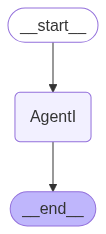

In [108]:
display(Image(GraphApp.get_graph().draw_mermaid_png()))

In [109]:
AIresponse=GraphApp.invoke({"message": HelloMessage})

In [110]:
AIresponse['message']

"Hello, I'm Nano, Your Personal Wellbeing Assistant, How is your day going today"

In [111]:
AIresponse2 = PricesGiver.invoke({"prices":prices})

In [112]:
AIresponse2['prices']

'1st Tier => 5, 2nd Tier => 10'